In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore", append=False)

In [83]:
df = pd.read_csv('train.csv')

In [85]:
df = df.drop(df.columns[0], axis=1)

In [86]:
df.head()

,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,recinhse,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,9101,IMA,0,KY,40207-,,,6901,0,,...,NaN,0,L,3,D,X,X,X,4.0,B
1,8601,LIS,2,MI,48504,,,4101,0,,...,NaN,0,L,2,F,X,X,X,49.0,B
2,9601,AGS,28,WA,99218,,,0,0,,...,NaN,0,L,3,E,X,X,X,48.0,B
3,9101,NAD,2,NM,88201,B,,5201,0,,...,34.0,0,L,1,F,X,X,X,39.0,C
4,9201,FRC,0,AL,35603,,,4301,0,,...,NaN,0,L,1,G,X,X,X,16.0,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15219 entries, 0 to 15218
Columns: 482 entries, Unnamed: 0 to geocode2
dtypes: float64(97), int64(311), object(74)
memory usage: 56.0+ MB


In [6]:
df.describe()

,Unnamed: 0,date,title,dob,age,numchld,income_range,wealth1,hit,mbcraft,...,fistdate,nextdate,timelag,avggift,id,responded,amount,hphone_d,rfa_2f,cluster2
count,15219.000000,15219.000000,15219.000000,15219.000000,11489.000000,1955.000000,11801.000000,8010.000000,15219.000000,6727.000000,...,15219.000000,13543.000000,13543.000000,15219.000000,15219.000000,15219.000000,798.000000,15219.000000,15219.000000,15206.000000
mean,7609.000000,9141.373875,44.125435,2708.815625,61.956306,1.543734,3.891958,5.302622,3.232998,0.154601,...,9135.435245,9147.688548,8.125378,13.445199,7609.000000,0.052434,26.239372,0.498784,1.913858,31.449494
std,4393.491209,346.223859,748.862582,2120.214470,16.681516,0.815977,1.849857,2.731421,8.538441,0.475260,...,321.746663,296.022984,7.338610,12.216777,4393.491209,0.222909,20.520760,0.500015,1.077313,18.668303
min,0.000000,8601.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,4912.000000,7703.000000,0.000000,1.857143,0.000000,0.000000,3.400000,0.000000,1.000000,1.000000
25%,3804.500000,8801.000000,0.000000,308.500000,49.000000,1.000000,2.000000,3.000000,0.000000,0.000000,...,8810.000000,8902.000000,4.000000,8.333333,3804.500000,0.000000,17.000000,0.000000,1.000000,15.000000
50%,7609.000000,9201.000000,1.000000,2604.000000,63.000000,1.000000,4.000000,6.000000,0.000000,0.000000,...,9202.000000,9204.000000,6.000000,11.666667,7609.000000,0.000000,20.400000,0.000000,2.000000,32.000000
75%,11413.500000,9501.000000,2.000000,4501.000000,76.000000,2.000000,5.000000,8.000000,3.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.555556,11413.500000,0.000000,34.000000,1.000000,3.000000,49.000000
max,15218.000000,9701.000000,39002.000000,9708.000000,98.000000,6.000000,7.000000,9.000000,240.000000,4.000000,...,9603.000000,9702.000000,442.000000,948.500000,15218.000000,1.000000,173.400000,1.000000,4.000000,62.000000


In [7]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
outliers

,Unnamed: 0,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
254,254,9501,TVH,1,CA,90068,,,5101,0,...,93.5,0,L,1,G,X,X,X,8.0,A
1755,1755,8801,AHC,0,CO,81501,,,1602,0,...,170.0,1,L,1,G,X,X,X,13.0,C
3574,3574,8601,FIG,0,WA,98103,,,803,0,...,173.4,0,L,4,G,L,2,C,10.0,A
9284,9284,8801,STK,1,TX,75243,,,5001,0,...,170.0,1,L,1,G,I,1,C,9.0,A
9984,9984,8701,ASC,1,IL,60467,,,0,0,...,170.0,1,L,1,G,C,1,C,5.0,A
11926,11926,9001,L01,1,CA,91606-,,,2401,0,...,170.0,1,L,2,G,X,X,X,31.0,A
13801,13801,9501,DCD,1,FL,33436,,,3001,0,...,127.5,1,L,1,G,X,X,X,13.0,B
14514,14514,8901,DUR,0,MO,64444,,,2607,0,...,170.0,0,L,4,E,X,X,X,43.0,B
15196,15196,9501,DCD,1,FL,33436,,,3001,0,...,127.5,1,L,1,G,X,X,X,13.0,B


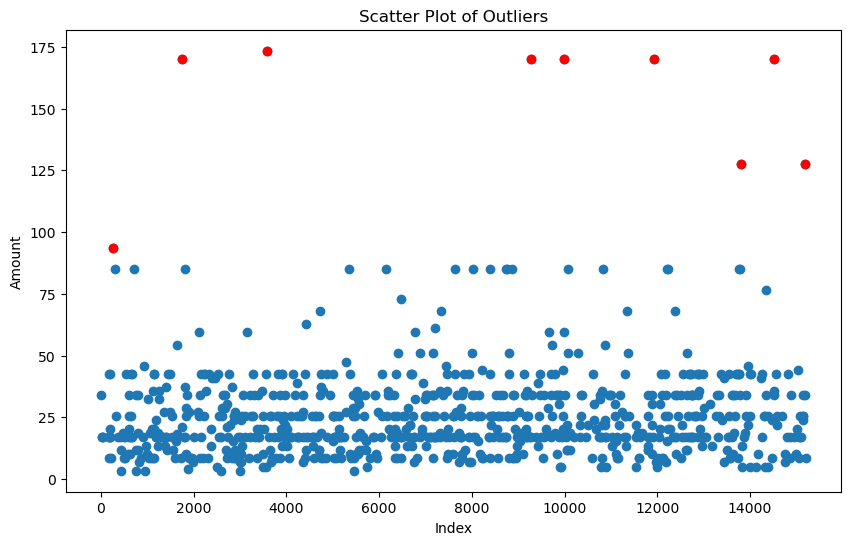

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df.index, y=df['amount'])
plt.scatter(x=outliers.index, y=outliers['amount'], color='red', label='Outliers')
plt.title('Scatter Plot of Outliers')
plt.xlabel('Index')
plt.ylabel('Amount')
plt.show()

In [9]:
#Confirming if any responded line item has no amount (0 means False and good to go)
df['responded'][df['amount'].isna()].sum()

0

In [10]:
# Then we can replace nan in amount with 0
df.loc[:, 'amount'] = df['amount'].fillna(0)

In [11]:
df

,Unnamed: 0,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,0,9101,IMA,0,KY,40207-,,,6901,0,...,0.0,0,L,3,D,X,X,X,4.0,B
1,1,8601,LIS,2,MI,48504,,,4101,0,...,0.0,0,L,2,F,X,X,X,49.0,B
2,2,9601,AGS,28,WA,99218,,,0,0,...,0.0,0,L,3,E,X,X,X,48.0,B
3,3,9101,NAD,2,NM,88201,B,,5201,0,...,34.0,0,L,1,F,X,X,X,39.0,C
4,4,9201,FRC,0,AL,35603,,,4301,0,...,0.0,0,L,1,G,X,X,X,16.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15214,15214,8701,FCR,2,FL,32526,,,0,0,...,0.0,0,L,2,E,X,X,X,43.0,B
15215,15215,8901,DUR,0,CA,92020,,,1911,0,...,0.0,0,L,1,G,X,X,X,19.0,A
15216,15216,8601,FRC,0,NC,28170,,,1601,0,...,0.0,1,L,2,F,X,X,X,61.0,D
15217,15217,8601,BHG,100,NC,28729,,,0,0,...,0.0,0,L,1,E,X,X,X,60.0,C


### DIMENSIONALITY REDUCTION (PCA)

In [12]:
#The following variables reflect characteristics of the customers neighborhood,  collected from the 1990 US Census.

pop_cols = df.loc[:, 'pop901':'ac2'].columns.tolist()
pop_df = df.loc[:, 'pop901':'ac2']
df.drop(pop_cols, axis=1, inplace=True)

In [13]:
pop_df.columns[pop_df.isna().any()].tolist()

['msa', 'adi', 'dma']

In [14]:
pop_df = pop_df.drop(['msa', 'adi', 'dma'], axis=1)

In [15]:
selected_features = pop_df.columns.tolist()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler1 = StandardScaler()
pop_df_scaled = scaler1.fit_transform(pop_df)

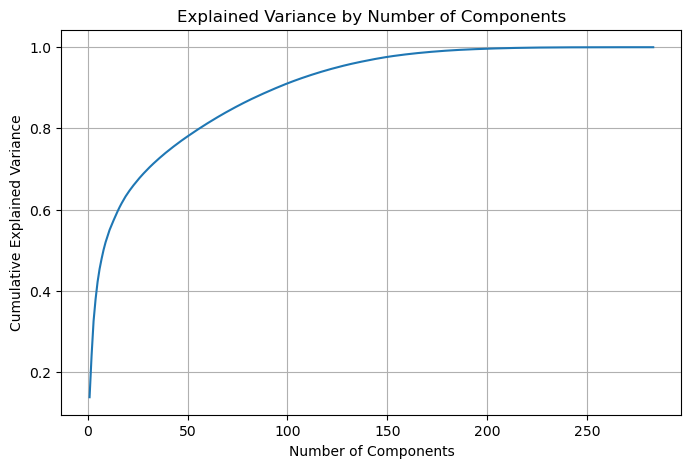

In [17]:
pca = PCA().fit(pop_df_scaled)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [18]:
pca = PCA(n_components=150)
principalComponents = pca.fit_transform(pop_df_scaled)

pcadf = pd.DataFrame(data=principalComponents,
                              columns=[f'pc{i+1}' for i in range(150)])


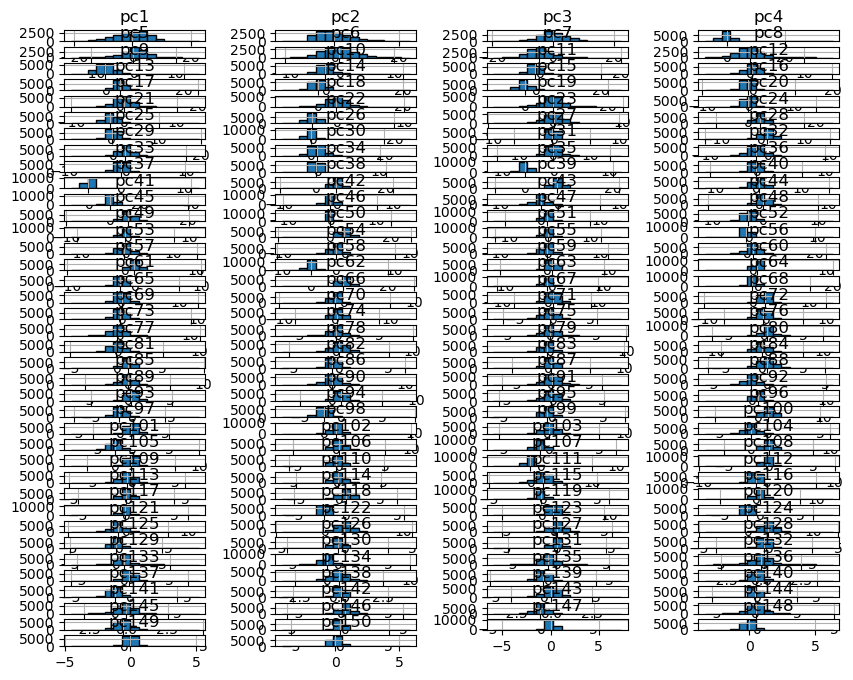

In [19]:
pcadf.hist(figsize=(10, 8), bins=15, layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [20]:
#The fields listed below are from the promotion history file. 
#Instead - We shall use the summary variables from the promotion history file for time being. 

prom_cols = df.loc[:, 'adate_2':'rfa_24'].columns.tolist()
df.drop(prom_cols, axis=1, inplace=True)

In [21]:
#The following fields are from the giving history file.
#Instead - We shall use the summary variables from the giving history file for time being. .

hist_cols = df.loc[:, 'rdate_3':'ramnt_24'].columns.tolist()
df.drop(hist_cols, axis=1, inplace=True)
df

,Unnamed: 0,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,0,9101,IMA,0,KY,40207-,,,6901,0,...,0.0,0,L,3,D,X,X,X,4.0,B
1,1,8601,LIS,2,MI,48504,,,4101,0,...,0.0,0,L,2,F,X,X,X,49.0,B
2,2,9601,AGS,28,WA,99218,,,0,0,...,0.0,0,L,3,E,X,X,X,48.0,B
3,3,9101,NAD,2,NM,88201,B,,5201,0,...,34.0,0,L,1,F,X,X,X,39.0,C
4,4,9201,FRC,0,AL,35603,,,4301,0,...,0.0,0,L,1,G,X,X,X,16.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15214,15214,8701,FCR,2,FL,32526,,,0,0,...,0.0,0,L,2,E,X,X,X,43.0,B
15215,15215,8901,DUR,0,CA,92020,,,1911,0,...,0.0,0,L,1,G,X,X,X,19.0,A
15216,15216,8601,FRC,0,NC,28170,,,1601,0,...,0.0,1,L,2,F,X,X,X,61.0,D
15217,15217,8601,BHG,100,NC,28729,,,0,0,...,0.0,0,L,1,E,X,X,X,60.0,C


In [22]:
# Coloumns doesnt seem to be any relevant here

df = df.drop(['malemili', 'malevet', 'vietvets', 'wwiivets', 'localgov', 'stategov', 'fedgov'], axis=1)

In [23]:
dt = pd.read_csv('data - types.csv')
dt.head()

,Column Name,Data Type,Description
0,date,Date,Origin Date. Date of customer's first gift to ...
1,source,Nominal,Origin Source - (Only 1st 3 bytes are used) - ...
2,title,Nominal,"Customer title code (e.g., 000 = _, 001 = MR.,..."
3,state,Nominal,State abbreviation (a nominal/symbolic field)
4,zip,Nominal,Zipcode (a nominal/symbolic field)


In [24]:
num_columns = dt[dt['Data Type'].isin(['Discrete', 'Continuous','Ordinal'])]['Column Name']
num_df = df[num_columns]

In [25]:
for column in num_df.columns:
    description = dt[dt['Column Name'] == column]['Description'].values[0]
    print(f"Column Name: {column}, Description: {description}")
#    print(num_df[column].head())
    print()


Column Name: age, Description: Overlay Age (0 = missing)

Column Name: numchld, Description: Number of Children

Column Name: income_range, Description: Household income range

Column Name: wealth1, Description: Wealth Rating

Column Name: hit, Description: MOR Flag # hit (Mail Order Response). Indicates total number of known times the customer has responded to a mail order offer other than ACE's.

Column Name: mbcraft, Description: Buy Craft Hobby

Column Name: mbgarden, Description: Buy Gardening

Column Name: mbbooks, Description: Buy Books

Column Name: mbcolect, Description: Buy Collectables

Column Name: magfaml, Description: Buy General Family Mags

Column Name: magfem, Description: Buy Female Mags

Column Name: magmale, Description: Buy Sports Mags

Column Name: pubgardn, Description: Gardening Pubs

Column Name: pubculin, Description: Culinary Pubs

Column Name: pubhlth, Description: Health Pubs

Column Name: pubdoity, Description: Do It Yourself Pubs

Column Name: pubnewfn, D

In [26]:
num_df.describe()

,age,numchld,income_range,wealth1,hit,mbcraft,mbgarden,mbbooks,mbcolect,magfaml,...,cardpm12,numprm12,ramntall,ngiftall,cardgift,minramnt,maxramnt,lastgift,timelag,avggift
count,11489.000000,1955.000000,11801.000000,8010.000000,15219.000000,6727.000000,6727.000000,6727.000000,6719.000000,6727.000000,...,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000,13543.000000,15219.000000
mean,61.956306,1.543734,3.891958,5.302622,3.232998,0.154601,0.058421,1.092166,0.062509,0.450870,...,5.350023,12.866483,106.022590,9.688087,5.106052,8.022808,20.373153,17.392542,8.125378,13.445199
std,16.681516,0.815977,1.849857,2.731421,8.538441,0.475260,0.258671,1.650150,0.299783,0.815176,...,1.216061,4.550809,140.131612,8.719194,4.552730,8.054527,43.833953,13.961306,7.338610,12.216777
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,15.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.857143
25%,49.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,11.000000,40.000000,3.000000,2.000000,3.000000,14.000000,10.000000,4.000000,8.333333
50%,63.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,12.000000,78.000000,7.000000,4.000000,5.000000,17.000000,15.000000,6.000000,11.666667
75%,76.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,...,6.000000,13.000000,132.000000,14.000000,7.000000,10.000000,23.000000,20.000000,11.000000,15.555556
max,98.000000,6.000000,7.000000,9.000000,240.000000,4.000000,3.000000,9.000000,5.000000,7.000000,...,17.000000,67.000000,9485.000000,147.000000,32.000000,300.000000,5000.000000,500.000000,442.000000,948.500000


### NUMERICAL VARIABLE DATA HANDLING (IMPUTATION)

In [27]:
coloumns_to_impute = ['age', 'income_range','wealth1','wealth2']
df.loc[:, coloumns_to_impute] = df[coloumns_to_impute].fillna(df[coloumns_to_impute].mean())

coloumns_to_fillna = ['numchld','nextdate', 'timelag']
df[coloumns_to_fillna] = df[coloumns_to_fillna].fillna(0)

coloumns_to_drop = ['mbcraft', 'mbgarden', 'mbbooks', 'mbcolect', 'magfaml', 'magfem', 'magmale','pubgardn', 'pubculin', 'pubhlth','pubdoity','pubnewfn', 'pubphoto', 'pubopp']
df.drop(coloumns_to_drop, axis=1, inplace=True)

df.head()

,Unnamed: 0,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,0,9101,IMA,0,KY,40207-,,,6901,0,...,0.0,0,L,3,D,X,X,X,4.0,B
1,1,8601,LIS,2,MI,48504,,,4101,0,...,0.0,0,L,2,F,X,X,X,49.0,B
2,2,9601,AGS,28,WA,99218,,,0,0,...,0.0,0,L,3,E,X,X,X,48.0,B
3,3,9101,NAD,2,NM,88201,B,,5201,0,...,34.0,0,L,1,F,X,X,X,39.0,C
4,4,9201,FRC,0,AL,35603,,,4301,0,...,0.0,0,L,1,G,X,X,X,16.0,C


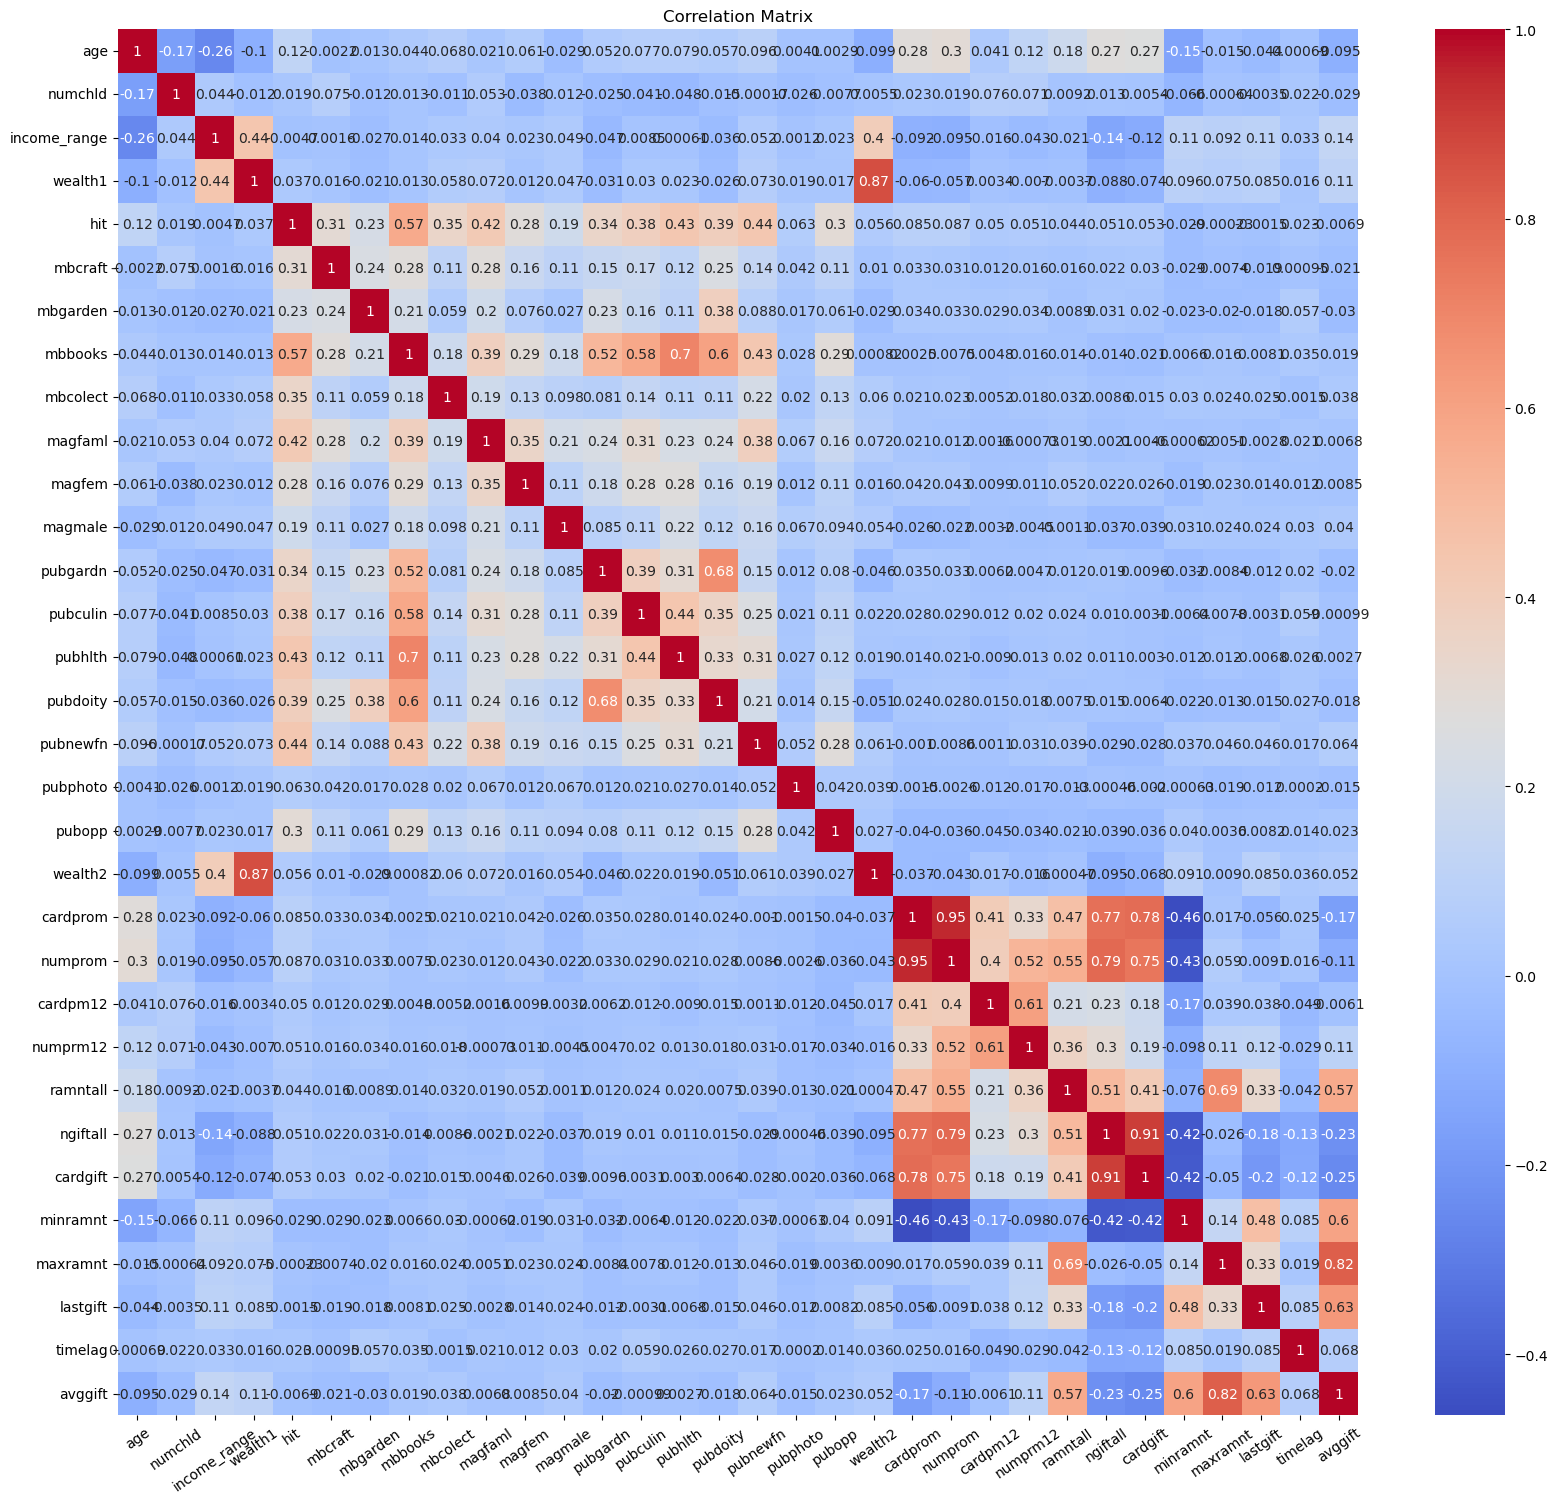

In [28]:
num_df.corr()
plt.figure(figsize=(20, 18))
heatmap = sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=35)
plt.title('Correlation Matrix')
plt.show()

In [29]:
coloumns_multicol = ['cardprom','avggift','cardgift']
df.drop(coloumns_multicol, axis=1, inplace=True)

### CATEGORICAL VARIABLE DATA HANDLING ( ONE-HOT ENCODING)

In [30]:
catn_columns = dt[dt['Data Type'].isin(['Nominal','Binary'])]['Column Name']
catn_columns
catn_df = df[catn_columns]

In [31]:
for column in catn_df:
    unique_items = df[column].nunique()
    description = dt[dt['Column Name'] == column]['Description'].values[0]
    print(f"Column Name: {column}, Unique Items: {unique_items}")
    print()

Column Name: source, Unique Items: 586

Column Name: title, Unique Items: 27

Column Name: state, Unique Items: 50

Column Name: zip, Unique Items: 7941

Column Name: mailcode, Unique Items: 2

Column Name: has_chapter, Unique Items: 2

Column Name: noexch, Unique Items: 6

Column Name: recinhse, Unique Items: 2

Column Name: recp3, Unique Items: 2

Column Name: recpgvg, Unique Items: 2

Column Name: recsweep, Unique Items: 2

Column Name: mdmaud, Unique Items: 14

Column Name: domain, Unique Items: 17

Column Name: cluster, Unique Items: 54

Column Name: ageflag, Unique Items: 3

Column Name: homeownr, Unique Items: 3

Column Name: child03, Unique Items: 4

Column Name: child07, Unique Items: 4

Column Name: child12, Unique Items: 4

Column Name: child18, Unique Items: 4

Column Name: gender, Unique Items: 6

Column Name: datasrce, Unique Items: 4

Column Name: solp3, Unique Items: 5

Column Name: solih, Unique Items: 8

Column Name: major, Unique Items: 2

Column Name: geocode, Uniqu

In [32]:
coloumns_cat_drop = [ 'zip', 'source']#,'state', 'domain', 'cluster', 'cluster2','title']
################### above line might have info
catn_df.drop(coloumns_cat_drop, axis=1, inplace=True)
df.drop(coloumns_cat_drop, axis=1, inplace=True)
df.head()

,Unnamed: 0,date,title,state,mailcode,has_chapter,dob,noexch,recinhse,recp3,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,0,9101,0,KY,,,6901,0,,,...,0.0,0,L,3,D,X,X,X,4.0,B
1,1,8601,2,MI,,,4101,0,,,...,0.0,0,L,2,F,X,X,X,49.0,B
2,2,9601,28,WA,,,0,0,,,...,0.0,0,L,3,E,X,X,X,48.0,B
3,3,9101,2,NM,B,,5201,0,,,...,34.0,0,L,1,F,X,X,X,39.0,C
4,4,9201,0,AL,,,4301,0,,,...,0.0,0,L,1,G,X,X,X,16.0,C


In [33]:
# One-hot encode the specified columns and drop the original columns
df = pd.get_dummies(df, columns=catn_df.columns, drop_first=True)
df.head()

,Unnamed: 0,date,dob,age,numchld,income_range,wealth1,hit,wealth2,maxadate,...,cluster2_57.0,cluster2_58.0,cluster2_59.0,cluster2_60.0,cluster2_61.0,cluster2_62.0,geocode2_A,geocode2_B,geocode2_C,geocode2_D
0,0,9101,6901,29.000000,0.0,3.000000,9.000000,0,9.000000,9702,...,False,False,False,False,False,False,False,True,False,False
1,1,8601,4101,57.000000,2.0,2.000000,5.302622,0,4.945184,9702,...,False,False,False,False,False,False,False,True,False,False
2,2,9601,0,61.956306,0.0,3.891958,5.302622,0,4.945184,9702,...,False,False,False,False,False,False,False,True,False,False
3,3,9101,5201,46.000000,0.0,3.000000,5.302622,0,4.945184,9702,...,False,False,False,False,False,False,False,False,True,False
4,4,9201,4301,55.000000,0.0,3.891958,5.302622,0,8.000000,9702,...,False,False,False,False,False,False,False,False,True,False


In [34]:
date_columns = dt[dt['Data Type'].isin(['Date'])]['Column Name']
date_columns

0         date
7          dob
69    maxadate
77    minrdate
79    maxrdate
81    lastdate
82    fistdate
83    nextdate
Name: Column Name, dtype: object

In [35]:
for column in date_columns:
    description = dt[dt['Column Name'] == column]['Description'].values[0]
    print(f"Column Name: {column}, Description: {description}")
#    print(df[column].head())
    print()

Column Name: date, Description: Origin Date. Date of customer's first gift to ACE YYMM format (Year/Month).

Column Name: dob, Description: Date of birth (YYMM, Year/Month format.)

Column Name: maxadate, Description: Date of the most recent promotion received (in YYMM, Year/Month format)

Column Name: minrdate, Description: Date associated with the smallest gift to date

Column Name: maxrdate, Description: Date associated with the largest gift to date

Column Name: lastdate, Description: Date associated with the most recent gift

Column Name: fistdate, Description: Date of first gift

Column Name: nextdate, Description: Date of second gift



In [36]:
df['dob'].value_counts().get(0, 0)
df['dob'] = df['dob'].replace(0, np.nan).fillna(df['dob'].replace(0, np.nan).mean())

In [37]:
df = pd.concat([df,pcadf],axis=1)

In [38]:
df.drop(['noexch_1'], axis=1, inplace=True)

In [39]:
scaler2 = StandardScaler()
df.update(pd.DataFrame(scaler2.fit_transform(df.drop(['responded', 'amount','id'], axis=1)), columns=df.drop(['responded', 'amount','id'], axis=1).columns, index=df.index))

In [40]:
df.describe()

,Unnamed: 0,date,dob,age,numchld,income_range,wealth1,hit,wealth2,maxadate,...,pc141,pc142,pc143,pc144,pc145,pc146,pc147,pc148,pc149,pc150
count,15219.000000,1.521900e+04,1.521900e+04,1.521900e+04,1.521900e+04,1.521900e+04,1.521900e+04,1.521900e+04,1.521900e+04,1.521900e+04,...,1.521900e+04,1.521900e+04,1.521900e+04,1.521900e+04,1.521900e+04,1.521900e+04,15219.000000,1.521900e+04,1.521900e+04,1.521900e+04
mean,0.000000,-2.464186e-15,4.435348e-18,1.192875e-16,1.517356e-17,-2.483795e-16,5.434468e-16,1.634076e-18,-6.349551e-17,-6.219758e-14,...,2.334394e-19,-1.027133e-17,-1.073821e-17,1.400636e-18,-2.334394e-19,-6.069423e-18,0.000000,-1.634076e-17,4.668787e-19,1.027133e-17
std,1.000033,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,...,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033,1.000033e+00,1.000033e+00,1.000033e+00
min,-1.731937,-1.560816e+00,-2.467238e+00,-4.205852e+00,-3.341045e-01,-1.775440e+00,-2.676122e+00,-3.786528e-01,-2.418636e+00,-1.631649e+01,...,-6.322634e+00,-1.056651e+01,-8.638446e+00,-6.467086e+00,-6.519218e+00,-1.208432e+01,-12.253632,-6.966574e+00,-9.586079e+00,-8.956045e+00
25%,-0.865969,-9.831358e-01,-6.788575e-01,-6.179655e-01,-3.341045e-01,-5.475938e-01,-1.527268e-01,-3.786528e-01,0.000000e+00,6.190996e-02,...,-5.650168e-01,-5.511226e-01,-5.856429e-01,-5.807189e-01,-5.798814e-01,-5.580012e-01,-0.570800,-5.726843e-01,-5.637488e-01,-5.863188e-01
50%,0.000000,1.722241e-01,0.000000e+00,0.000000e+00,-3.341045e-01,-2.726366e-16,4.482450e-16,-3.786528e-01,0.000000e+00,6.190996e-02,...,1.146721e-02,1.015862e-02,5.716199e-03,2.532395e-03,3.005245e-03,5.113569e-03,0.000219,2.384677e-03,4.190276e-03,1.744048e-02
75%,0.865969,1.038744e+00,6.280358e-01,6.929929e-01,-3.341045e-01,6.802524e-01,3.519522e-01,-2.728904e-02,2.681004e-02,6.190996e-02,...,6.030130e-01,5.506210e-01,5.874072e-01,5.956251e-01,5.847750e-01,5.641652e-01,0.562785,5.795519e-01,5.555356e-01,5.801137e-01
max,1.731937,1.616424e+00,4.209611e+00,2.486936e+00,9.774716e+00,1.908098e+00,1.865989e+00,2.773045e+01,1.983167e+00,6.190996e-02,...,8.328818e+00,1.087777e+01,1.481932e+01,9.584912e+00,9.324625e+00,1.460496e+01,15.153867,1.309178e+01,1.091815e+01,1.260697e+01


In [41]:
df.responded.unique()

array([0, 1])

### CLASSIFICATION

In [42]:
X = df.drop(['amount', 'responded','id'], axis=1)
y = df[['responded']]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [46]:
y.value_counts()

responded
0            14421
1              798
Name: count, dtype: int64

In [47]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# rf_model = RandomForestClassifier(random_state=42)
# param_grid = {'n_estimators': [100, 300], 
#               'max_depth': [None, 20], 
#               'min_samples_split': [2, 5]}

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='recall')
# grid_search.fit(X_train, y_train)
# print("Best param: ", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# conf_matrix = confusion_matrix(y_test, y_pred)
# print(conf_matrix)

# #   n_estimators=300, min_samples_split=2, max_depth=None, min_samples_leaf=1

In [48]:
rf_order = X_train.columns.tolist()

In [49]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=300, class_weight='balanced', min_samples_split=2, max_depth=None, min_samples_leaf=1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[4327    0]
 [ 227   12]]


Recall: 0.0502092050209205
Accuracy: 0.9502847130968024
Precision: 1.0
F1 Score: 0.09561752988047809


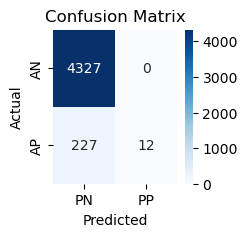

In [50]:
recall = recall_score(y_test, y_pred, average='binary') 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


plt.figure(figsize=(2,2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["PN", "PP"], yticklabels=["AN", "AP"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### REGRESSION

In [51]:
r_df = df[df['responded'] == 1]

In [52]:
X = r_df.drop(['amount', 'responded','id'], axis=1)
y = r_df[['amount']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [55]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

svr_model = SVR()
svr_model.fit(X_train_scaled, y_train_scaled.ravel())

y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))



mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"SVR MAPE: {mape}%")


SVR MAPE: 57.391550623492904%


In [56]:
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'epsilon': [0.001, 0.01, 0.1, 1],
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
# }

# grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train_scaled)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

### ANALYSIS AND OUTPUT

In [57]:
data_test = pd.read_csv('test.csv')
tester = data_test.copy()
tester.drop(['market'], axis=1, inplace=True)

In [58]:
pop_df_test = tester[pop_cols]
tester.drop(pop_cols, axis=1, inplace=True)
pop_df_test = pop_df_test.drop(['msa', 'adi', 'dma'], axis=1)

pop_df_test_scaled = scaler1.transform(pop_df_test)

principalComponents_test = pca.transform(pop_df_test_scaled)

pcadf_test = pd.DataFrame(data=principalComponents_test,
                          columns=[f'pc{i+1}' for i in range(150)])

tester.drop(prom_cols + hist_cols, axis=1, inplace=True)

In [59]:
tester.drop(['malemili', 'malevet', 'vietvets', 'wwiivets', 'localgov', 'stategov', 'fedgov'], axis=1, inplace=True)
tester.loc[:, coloumns_to_impute] = tester[coloumns_to_impute].fillna(tester[coloumns_to_impute].mean())
tester[coloumns_to_fillna] = tester[coloumns_to_fillna].fillna(0)
tester.drop(coloumns_to_drop, axis=1, inplace=True)
tester.drop(coloumns_multicol, axis=1, inplace=True)
tester.drop(coloumns_cat_drop, axis=1, inplace=True)

In [60]:
tester = pd.get_dummies(tester, columns=catn_df.columns, drop_first=True)

In [61]:
tester['dob'] = tester['dob'].replace(0, np.nan).fillna(tester['dob'].replace(0, np.nan).mean())

In [62]:
tester = pd.concat([tester, pcadf_test], axis=1)

In [63]:
tester.drop(['noexch_1'], axis=1, inplace=True)

In [64]:
tester.update(pd.DataFrame(scaler2.fit_transform(tester.drop(['id'], axis=1)), columns=tester.drop(['id'], axis=1).columns, index=tester.index))

In [65]:
rf_order = list(X_train.columns)
missing_features = [feature for feature in rf_order if feature not in tester.columns]

for feature in missing_features:
    tester[feature] = 0

In [66]:
tester_align = tester.drop(['id'], axis=1)

In [67]:
tester_align = tester_align.reindex(columns=rf_order)

In [68]:
rf_predictions = rf_model.predict(tester_align)
rf_probab = rf_model.predict_proba(tester_align)[:, 1]

In [69]:
tester_features_scaled = scaler_X.transform(tester_align)

In [70]:
svr_predictions_scaled = svr_model.predict(tester_features_scaled)
svr_predictions = scaler_y.inverse_transform(svr_predictions_scaled.reshape(-1, 1)).flatten()

In [71]:
results_df = pd.DataFrame({
    'id': tester['id'],
    'rf_predicted_responded': rf_predictions,
    'rf_probability_responded': rf_probab,
    'svr_predicted_amount': svr_predictions
})

In [72]:
np.unique(rf_predictions, return_counts=True)

(array([0, 1]), array([9574,   15]))

In [73]:
data_test = data_test.merge(results_df, on='id', how='left')

In [74]:
zdf = pd.read_csv('zipCodeMarketingCosts.csv')
# data_test['zip']= data_test['zip'].str.replace("-","")
# zdf.zip = zdf.zip.astype(str)
data_test = pd.merge(data_test,zdf[['zip','marketingCost']], on='zip', how = 'left')

In [75]:
data_test['market'] = (data_test['marketingCost'] <= data_test['svr_predicted_amount'] * data_test['rf_probability_responded']).astype(int)

In [76]:
np.unique(data_test['market'], return_counts=True)

(array([0, 1]), array([8724,  865]))

In [77]:
analysis = data_test[['id','rf_predicted_responded', 'rf_probability_responded', 'svr_predicted_amount','marketingCost','market']]

In [78]:
data_test = data_test.drop(['rf_predicted_responded', 'rf_probability_responded', 'svr_predicted_amount','marketingCost'], axis=1)

In [79]:
data_test

,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,recinhse,...,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2,market
0,9301,TRE,1,FL,34461,,,2001,0,,...,1,L,2,F,X,X,X,52.0,C,0
1,9101,PV3,1002,CA,91106,,,0,0,,...,0,L,1,F,X,X,X,24.0,A,0
2,8601,MBC,0,MN,56470,,,4305,0,,...,0,L,3,D,X,X,X,59.0,D,0
3,8601,BHG,0,IN,47441,,,0,0,,...,0,L,4,D,X,X,X,59.0,D,0
4,9501,AIR,0,NC,28906,,,4201,0,,...,0,L,1,F,X,X,X,60.0,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,8601,AMB,1,AR,71646,,,3801,0,,...,0,L,4,D,X,X,X,61.0,D,0
9585,8601,FRC,2,IL,60827,,,810,0,,...,0,L,1,G,X,X,X,22.0,A,0
9586,9601,MHM,1,CA,96073,,,3201,0,,...,0,L,1,F,X,X,X,41.0,C,0
9587,9501,MCO,0,CA,91320,,,0,0,,...,0,L,2,F,X,X,X,11.0,A,0


In [80]:
data_test.to_csv('test.csv', index=False)

In [81]:
analysis.to_csv('result.csv', index=False)

In [82]:
data_test.market.value_counts()

market
0    8724
1     865
Name: count, dtype: int64